In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
data = pd.read_excel(r"C:\Users\atdal\Downloads\Dataset3.xlsx")

## Base de dados

In [3]:
data.head(2)

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.9,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.6,58.0


#### Dummy variables

In [4]:
data.loc[:,('Currency')] = data['Currency'].map(lambda x: 1 if x == 'Euro' else 0)
data.loc[:,('European Union Membership')] = data['European Union Membership'].map(lambda x: 1 if x == 'Member' else 0)
data.loc[:,('Level of development')] = data['Level of development'].map(lambda x: 1 if x == 'Developed' else 0)

#### Matriz de correlação

In [5]:
data.drop('No',axis = 1).corr() 

,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
Level of development,1.000000,0.757282,0.608581,0.865168,0.809970,-0.512364,0.356474
European Union Membership,0.757282,1.000000,0.803638,0.625371,0.481864,-0.416360,0.181569
Currency,0.608581,0.803638,1.000000,0.491834,0.415157,-0.333552,0.110886
Women Entrepreneurship Index,0.865168,0.625371,0.491834,1.000000,0.914580,-0.455532,0.441372
Entrepreneurship Index,0.809970,0.481864,0.415157,0.914580,1.000000,-0.395370,0.334170
Inflation rate,-0.512364,-0.416360,-0.333552,-0.455532,-0.395370,1.000000,-0.139802
Female Labor Force Participation Rate,0.356474,0.181569,0.110886,0.441372,0.334170,-0.139802,1.000000


### Figura 1: Nível de Desenvolvimento e Nível de Empreendedorismo Feminino

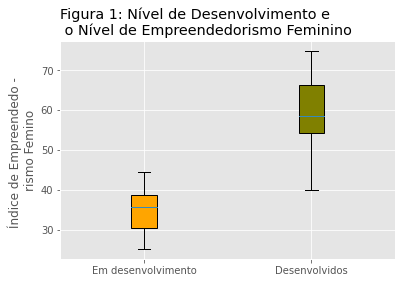

In [6]:
wei_developing = data[data['Level of development'] == 0]['Women Entrepreneurship Index'].to_list()
wei_developed = data[data['Level of development'] == 1]['Women Entrepreneurship Index'].to_list()
dados = [wei_developing,wei_developed]
fig, ax = plt.subplots()
box = ax.boxplot(dados,labels = ['Em desenvolvimento','Desenvolvidos'], patch_artist= True)
ax.set_title('Figura 1: Nível de Desenvolvimento e\n o Nível de Empreendedorismo Feminino', loc = 'left')
ax.set_ylabel('Índice de Empreendedo - \nrismo Femino')

colors = ['orange','olive']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

In [7]:
"Média em Países desenvolvidos é {} e a mediana {}, em países em desenvolvimento {}, {} respectivamente".format(data[data['Level of development'] == 1]['Women Entrepreneurship Index'].mean(),data[data['Level of development'] == 1]['Women Entrepreneurship Index'].median(),data[data['Level of development'] == 0]['Women Entrepreneurship Index'].mean(),data[data['Level of development'] == 0]['Women Entrepreneurship Index'].median())

'Média em Países desenvolvidos é 59.35925925925926 e a mediana 58.5, em países em desenvolvimento 34.87083333333333, 35.900000000000006 respectivamente'

## Figura 2: Nível de Desenvolvimento e Taxa de Particiação Feminina no Mercado

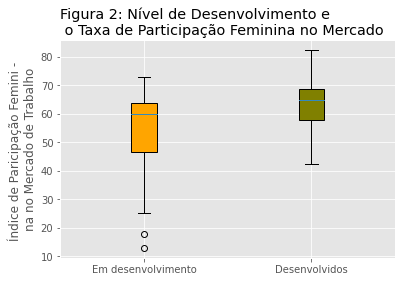

In [8]:
fwr_developing = data[data['Level of development'] == 0]['Female Labor Force Participation Rate'].to_list()
fwr_developed = data[data['Level of development'] == 1]['Female Labor Force Participation Rate'].to_list()
dados = [fwr_developing,fwr_developed]
fig, ax = plt.subplots()
box = ax.boxplot(dados,labels = ['Em desenvolvimento','Desenvolvidos'], patch_artist= True)
ax.set_title('Figura 2: Nível de Desenvolvimento e\n o Taxa de Participação Feminina no Mercado', loc = 'left')
ax.set_ylabel('Índice de Paricipação Femini - \nna no Mercado de Trabalho')

colors = ['orange','olive']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

In [9]:
"Média em Países desenvolvidos é {} e a mediana {}, em países em desenvolvimento {}, {} respectivamente".format(data[data['Level of development'] == 1]['Female Labor Force Participation Rate'].mean(),data[data['Level of development'] == 1]['Female Labor Force Participation Rate'].median(),data[data['Level of development'] == 0]['Female Labor Force Participation Rate'].mean(),data[data['Level of development'] == 0]['Female Labor Force Participation Rate'].median())

'Média em Países desenvolvidos é 63.095555555555556 e a mediana 64.7, em países em desenvolvimento 53.29125, 60.099999999999994 respectivamente'

#### Filtrando os países por continente

In [10]:
AL = ['Argentina','Jamaica','Brazil','Bolivia','Costa Rica','Ecuador','El Salvador','Mexico','Panama','Peru','Uruguay']
Eur = ['Austria','Belgium','Finland','France','Germany','Greece','Iceland','Ireland','Italy','Netherlands','Spain','Denmark','Sweden','Sweden','Norway','Switzerland',]
east_eur = ['Estonia','Macedonia','Latvia','Lithuania','Slovakia','Slovenia','Croatia','Hungary','Poland','Bosnia and Herzegovina']
Asia = ['Japan','Taiwan','China','India','Malaysia','Russia','Saudi Arabia','Turkey','Thailand']
Africa = ['Algeria','Egypt','Ghana','Tunisia']
Oceania = ['Australia','Singapore']
def find_continent(x):
    continente = ""
    continente = 'Ásia' if x in  Asia else continente
    continente = 'Amer. Lat & Car.' if x in AL else continente
    continente = 'Leste EUR.' if x in east_eur else continente
    continente = 'Europa' if x in Eur else continente
    continente = 'África' if x in Africa else continente
    continente = 'Oceania' if x in Oceania else continente
    return continente

data['Continente']= data['Country'].map(lambda x:find_continent(x))

### Tabela da representatividade amostral

In [11]:
list_continentes = data['Continente'].drop_duplicates().to_list()
list_países = [len(data[data['Continente'] == c]) for c in list_continentes]
list_proporção = ["{:.1%}".format((len(data[data['Continente'] == c]) / len(data))) for c in list_continentes]
list_desenvolvidos = [len(data[(data['Continente'] == c) & (data['Level of development'] == 1)]) for c in list_continentes]
list_desenvolvimento = [len(data[(data['Continente'] == c) & (data['Level of development'] == 0)]) for c in list_continentes]
list_continentes[5] = 'AL. & C.'
dic = {'Continente':list_continentes,'Países':list_países,'Proporção':list_proporção,'Desenvolvidos':list_desenvolvidos,'Desenvolvimento':list_desenvolvimento}
df = pd.DataFrame(data = dic)
df.style.set_properties(**{'text-align': 'center'})


,Continente,Países,Proporção,Desenvolvidos,Desenvolvimento
0,Europa,15,29.4%,15,0
1,Leste EUR.,10,19.6%,8,2
2,Oceania,2,3.9%,2,0
3,Ásia,9,17.6%,2,7
4,África,4,7.8%,0,4
5,AL. & C.,11,21.6%,0,11


## Figura 3: Performance dos índices nos continentes

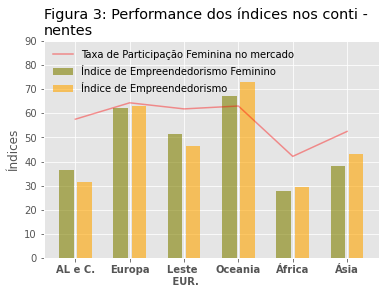

In [12]:
d = data.drop('No', axis = 1).groupby(['Continente']).mean()
fig, ax = plt.subplots()
w = 0.08
c1 = 'olive'
c2 = 'orange'
a = 0.6
ax.bar(0.5,d.loc['Amer. Lat & Car.']['Women Entrepreneurship Index'],width = w, color = c1,alpha = a,label = 'Índice de Empreendedorismo Feminino')
ax.bar(0.6,d.loc['Amer. Lat & Car.']['Entrepreneurship Index'],width = w,color = c2,alpha = a, label = 'Índice de Empreendedorismo')

ax.bar(0.8,d.loc['Europa']['Women Entrepreneurship Index'],width = w, color = c1,alpha = a)
ax.bar(0.9,d.loc['Europa']['Entrepreneurship Index'],width = w,color = c2,alpha = a)

ax.bar(1.1,d.loc['Leste EUR.']['Women Entrepreneurship Index'],width = w, color = c1,alpha = a)
ax.bar(1.2,d.loc['Leste EUR.']['Entrepreneurship Index'],width = w,color = c2,alpha = a)

ax.bar(1.4,d.loc['Oceania']['Women Entrepreneurship Index'],width = w, color = c1,alpha = a)
ax.bar(1.5,d.loc['Oceania']['Entrepreneurship Index'],width = w,color = c2,alpha = a)

ax.bar(1.7,d.loc['África']['Women Entrepreneurship Index'],width = w, color = c1,alpha = a)
ax.bar(1.8,d.loc['África']['Entrepreneurship Index'],width = w,color = c2,alpha = a)

ax.bar(2,d.loc['Ásia']['Women Entrepreneurship Index'],width = w, color = c1,alpha = a)
ax.bar(2.1,d.loc['Ásia']['Entrepreneurship Index'],width = w,color = c2,alpha = a)

ax.plot([0.55,0.85,1.15,1.45,1.75,2.05],d['Female Labor Force Participation Rate'].to_list(), color = 'red',alpha = a-0.2, label = 'Taxa de Participação Feminina no mercado')

ax.set_xticks([0.55,0.85,1.15,1.45,1.75,2.05])
ax.set_xticklabels(['AL e C.','Europa','Leste \n EUR.','Oceania','África','Ásia'],fontweight = 'bold')
ax.set_ylim(0,90)
ax.set_ylabel("Índices")
ax.set_title('Figura 3: Performance dos índices nos conti - \nnentes', loc = 'left')
plt.legend(frameon = False,loc = 'upper left')

In [13]:
data.groupby(['Continente','Level of development']).median()

No  European Union Membership  \
Continente       Level of development                                    
Amer. Lat & Car. 0                     16.0                        0.0   
Europa           1                     25.0                        1.0   
Leste EUR.       0                     22.0                        0.0   
                 1                     34.5                        1.0   
Oceania          1                     26.0                        0.0   
África           0                     18.0                        0.0   
Ásia             0                     47.0                        0.0   
                 1                     44.0                        0.0   

                                       Currency  Women Entrepreneurship Index  \
Continente       Level of development                                           
Amer. Lat & Car. 0                          0.0                         36.10   
Europa           1                          1.0                         64.30   
Leste EUR.       0                          0.0                         36.40   
                 1                          1.0                         55.65   
Oceania          1                          0.0                         67.30   
África           0                          0.0                         27.55   
Ásia             0                          0.0                         37.00   
                 1                          0.0                         46.70   

                                       Entrepreneurship Index  Inflation rate  \
Continente       Level of development                                           
Amer. Lat & Car. 0                                      30.70           3.500   
Europa           1                                      65.70           0.000   
Leste EUR.       0                                      33.00           1.350   
                 1                                      50.25          -0.500   
Oceania          1                                      72.85           0.500   
África           0                                      29.15           7.900   
Ásia             0                                      36.40           2.300   
                 1                                      59.30           0.095   

                                       Female Labor Force Participation Rate  
Continente       Level of development                                         
Amer. Lat & Car. 0                                                    59.400  
Europa           1                                                    67.700  
Leste EUR.       0                                                    62.450  
                 1                                                    60.700  
Oceania          1                                                    62.990  
África           0                                                    42.995  
Ásia             0                                                    61.100  
                 1                                                    59.850

In [14]:
(data.groupby('Level of development').mean().loc[1]/data.groupby('Level of development').mean().loc[0]-1)*100

No                                        6.385696
European Union Membership                      inf
Currency                                       inf
Women Entrepreneurship Index             70.226099
Entrepreneurship Index                   77.744577
Inflation rate                          -99.743310
Female Labor Force Participation Rate    18.397590
dtype: float64

## Figura 4: Taxa de inflação X Continentes

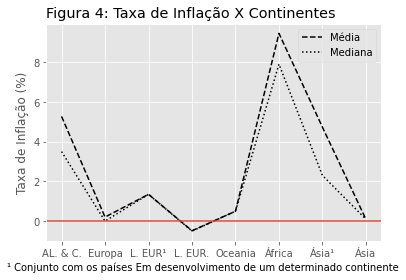

In [15]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7,8],data.groupby(['Continente','Level of development']).mean()['Inflation rate'].to_list(), ls = '--',label = 'Média',c = 'black')
ax.plot([1,2,3,4,5,6,7,8],data.groupby(['Continente','Level of development']).median()['Inflation rate'].to_list(), ls = 'dotted',label = 'Mediana', c = 'black')

ax.set_xticks([1,2,3,4,5,6,7,8])
ax.set_xticklabels(['AL. & C.', 'Europa','L. EUR¹','L. EUR.','Oceania','África','Ásia¹','Ásia'])
ax.axhline(0)
ax.set_ylabel('Taxa de Inflação (%)')
ax.set_title('Figura 4: Taxa de Inflação X Continentes', loc ='left')
ax.text(-0.25, -2.5,"¹ Conjunto com os países Em desenvolvimento de um determinado continente")
plt.legend()